In [6]:
from IPython.display import display, IFrame

# Replace 'yourfile.pdf' with the path to your PDF file
file_path = 'heat_eqn_1D.pdf'

# Display the PDF
display(IFrame(file_path, width=800, height=600))

In [2]:
# import all the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [19]:
############### define function and solve pde #####################################################
alpha = 1

# x-axis details
xlen = 1
nx = 10
delx = xlen/nx
x = np.linspace(0, xlen, nx)

# time-axis details
deltmax = (delx**2)/(4*alpha)
# we will take 1/10 th of the maximum values of deltamax as time interval
delt = .1*deltmax  
nt = 50000

# deltmax, alpha*(deltmax/delx**2)
# make a matrix with dimension: nt * nx

def initial_u(nt=nt, nx=nx):
    u = np.empty(( nt, nx))
    u = np.random.rand(nt,nx)
#     uguess = .5
#     u.fill(uguess)
    #  put the boundary conditions
    u[:,0] = 100
    u[:, nx-1] = -10
    return u
u = initial_u()

# Note: the range along x
def calculate(u):   
    for k in range(0, nt-1):
        for i in range(1, nx-1, 1): 
            u[k+1, i] = u[k, i] + alpha*(delt/delx**2)*(u[k, i+1] + u[k, i-1] - 2*u[k, i])
    return u

#########################################################################################################
# initialize u
u = initial_u()

# Do the calculation here (Solve PDE!)
u = calculate(u)
#########################################################################################################

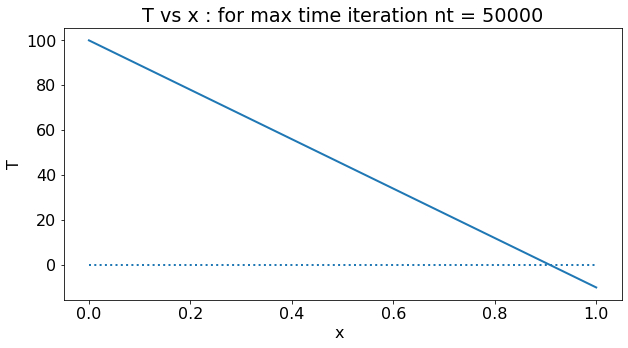

In [20]:
#########################################################################################################
fig = plt.figure (figsize=(10, 5))
plt.rcParams['font.size'] = '16'
plt.rcParams['lines.linewidth'] = '2'

# plt.plot(x, u[130,:]/u.max())
plt.plot(x, u[nt-1,:])
# plot the known solution!
# plt.plot(x, np.sin(np.pi*x))
# plt.plot(x, np.cos(2*np.pi*x))
plt.xlabel("x ")
plt.ylabel("T")
# plt.ylim(0,110)
plt.hlines(y=0.0,xmin=0,xmax=1, linestyle='dotted')
plt.title(f"T vs x : for max time iteration nt = {nt}")


### plt.savefig('scalar_pde_1D_codetest_vr3.png',facecolor="w", transparent=True, dpi=300)
plt.show()

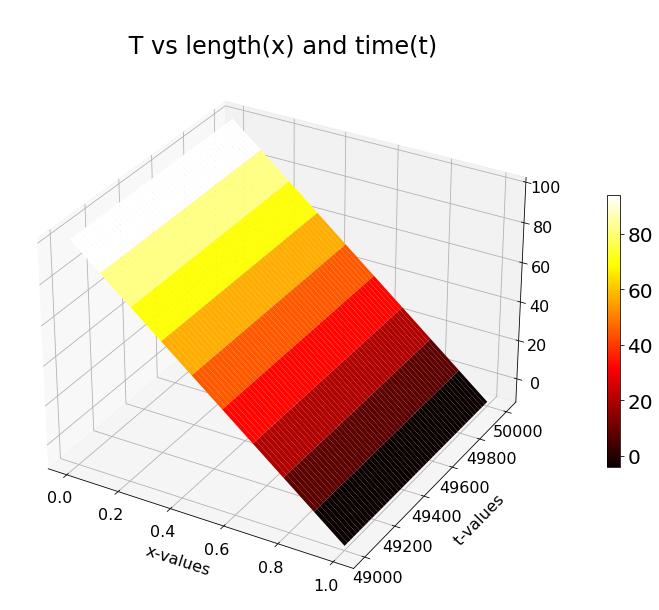

In [21]:
#### Import libraries
from matplotlib import cm
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Creating figure
fig = plt.figure(figsize =(20, 10))
ax = plt.axes(projection ='3d')
plt.rcParams['font.size'] = '20'

# Creating color map
my_cmap = plt.get_cmap('hot')

t = np.linspace(0,nt, nt)
X, T = np.meshgrid(x,t)
surf = ax.plot_surface(X[nt-1000:,:], T[nt-1000:,:], u[nt-1000:,:], cmap = my_cmap, edgecolor ='none')
fig.colorbar(surf, ax = ax, shrink = 0.5, aspect = 20)
ax.set_xlabel("\nx-values")
ax.set_ylabel("\n\n t-values")
ax.set_title(f"\n T vs length(x) and time(t)")


plt.show()